This file is to select the MEG data for our paper when considering age and gender balance

Note that I only filter the datasets from Control group

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np 
from scipy.stats import chi2_contingency
import scipy
import os
import matplotlib.pyplot as plt

In [2]:
# the baseline data for the current dataset
os.chdir("/home/hujin/jin/MyResearch/TVDN-AD")
biomarker = pd.read_excel("./OtherFils/biomarker_AD.xlsx")
all_data = pd.read_excel("./OtherFils/AllDataBaselineOrdered_r_ncpt_more.xls");
data_instudy = all_data[all_data["KeepIt"]==1];
data_instudy_AD = data_instudy[data_instudy["Grp"]=="AD"]
data_instudy_Ctrl = data_instudy[data_instudy["Grp"]=="Ctrl"];

# Education

In [186]:
key = "Education" # MEG_Age, Gender
v_AD = np.array(data_instudy_AD[key])
v_Ctrl = np.array(data_instudy_Ctrl[key]);
v_AD1, v_Ctrl1 = v_AD[~np.isnan(v_AD)],  v_Ctrl[~np.isnan(v_Ctrl)]
#ttest = scipy.stats.ttest_ind(v_AD1, v_Ctrl1, equal_var=False)
#pval = ttest.pvalue

print(v_AD1.mean(), v_Ctrl1.mean(), v_AD1.std(), v_Ctrl1.std())
print(np.isnan(v_AD).mean(), np.isnan(v_Ctrl).mean())
np.isnan(v_AD).sum(), np.isnan(v_Ctrl).sum()#, pval

16.325581395348838 17.384615384615383 2.5171128739329474 1.9350397148960155
0.022727272727272728 0.26136363636363635


(2, 23)

In [191]:
v_AD1[v_AD1_cate==0]

array([12., 14., 12., 14., 14., 14., 14., 12., 14., 11., 14., 12., 14.,
       14., 14., 13., 13., 15., 12., 12., 14., 14., 15., 12., 14.])

In [192]:
def _get_cts(vec):
    vs, cts = np.unique(vec, return_counts=1)
    idxs = np.argsort(vs)
    return cts[idxs]
cate_bins = [16, 18, 20]
v_AD1_cate = np.digitize(v_AD1, bins=cate_bins)
v_Ctrl1_cate = np.digitize(v_Ctrl1, bins=cate_bins)
tb = np.stack([_get_cts(v_AD1_cate), _get_cts(v_Ctrl1_cate)])
scipy.stats.chi2_contingency(tb, correction=True), tb

((7.526679630409111,
  0.05687688633685281,
  3,
  array([[19.36423841, 27.33774834, 25.62913907, 13.66887417],
         [14.63576159, 20.66225166, 19.37086093, 10.33112583]])),
 array([[25, 29, 22, 10],
        [ 9, 19, 23, 14]]))

In [202]:
tbf = np.concatenate([tb, np.array([2, 23]).reshape(2, 1)], axis=1)
np.round(100*tbf/tbf.sum(axis=1, keepdims=1), 0)

array([[28., 33., 25., 11.,  2.],
       [10., 22., 26., 16., 26.]])

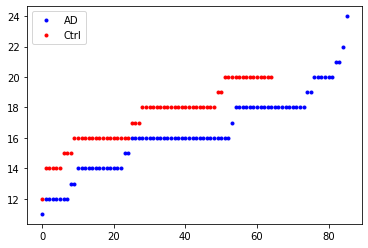

In [184]:
plt.plot(np.sort(v_AD1), ".b", label="AD")
plt.plot(np.sort(v_Ctrl1), ".r", label="Ctrl")
plt.legend()

# Biomarker

In [12]:
np.array(biomarker["AB-SCAN"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       'Autopsy', 'Autopsy', 'Autopsy', 'Autopsy', 'Autopsy', 'Autopsy',
       'CSF', 'CSF', 'CSF', 'CSF', 'CSF', 'CSF', 'CSF', 'CSF', 'CSF',
       'CSF'], dtype=object)

In [39]:
from collections import defaultdict as ddict
vs = ddict(int)
for rid, v in zip(biomarker["RADID"], biomarker["AB-SCAN"]):
    if rid in np.array(data_instudy_AD["RID"]):
        vs[v] += 1
vs

defaultdict(int, {1: 63, 'Autopsy': 6, 'CSF': 8})

In [49]:
# a new messy version (on Jul 1, 2023)
new_data = pd.read_excel("./OtherFils/AllDataBaselineOrdered_r_ncpt_permuate_PETSCAN.xls");
np.sum(np.array(new_data[new_data["Grp"]=="AD"]["PET Scan"]) == "Yes")

65

In [50]:
np.sum(np.array(new_data[new_data["Grp"]=="AD"]["PET Scan"]) == "No")

23